# Assignment 08 - Machine Learning
This assignment revoles around working with; Feature Engineering, Machine Learning and Model Validation

## Obnoxious Consequence
- Martin Snedvig Rasmussen
- Michael Ejdal Lundsgaard
- Morten Bokkenheuser-Bæhr
- Simon Kepp Stennicke

# Exercises

https://think.cs.vt.edu/corgis/csv/cars/cars.html  
https://think.cs.vt.edu/corgis/csv/cars/cars.csv

### Download the data

- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.

### Linear regression

- Perform linear regression on the downloaded dataset, where `y=Highway mpg` and `x=Horsepower`.
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is `y` when `x=2000`.
- Show the regression line on a scatterplot with the other datapoints.

### Classification

- Using `sklearn` create a classifier that can predict the make of a car, based on provided features. The following features should be included:
  - `City mpg`
  - `Highway mpg`
  - `Height`
  - `Width`
  - `Length`
  - `Horsepower`
  - `Year`
- Show the decisiontree of your model.
- Use your model to predict the make of a car.

## Review questions 

1. Did the student programatically download and import the data?
2. Did the student correctly display the regression line in a graph`?
3. Did the student find the coefficient of the line, and reflect on its meaning?
4. Did the student correctly provide their classification model with imported data?

# Solution

## Part 01 - Download the data

In [4]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.tree import DecisionTreeClassifier as dtc
%matplotlib inline

In [1]:
!python download_url.py https://think.cs.vt.edu/corgis/csv/cars/cars.csv

In [5]:
local_file = glob('*.csv')[0]
df = pd.read_csv(local_file)
df.head()

,City mpg,Classification,Driveline,Engine Type,Fuel Type,Height,Highway mpg,Horsepower,Hybrid,ID,Length,Make,Model Year,Number of Forward Gears,Torque,Transmission,Width,Year
0,18,Automatic transmission,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,Gasoline,140,25,250,False,2009 Audi A3 3.2,143,Audi,2009 Audi A3,6,236,6 Speed Automatic Select Shift,202,2009
1,22,Automatic transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T AT,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009
2,21,Manual transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,30,200,False,2009 Audi A3 2.0 T,143,Audi,2009 Audi A3,6,207,6 Speed Manual,202,2009
3,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T Quattro,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009
4,21,Automatic transmission,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T Quattro,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009


## Part 02 - Linear regression

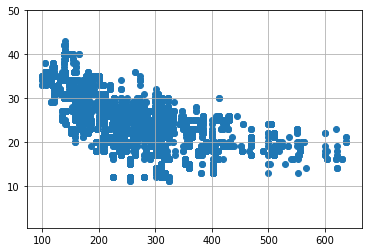

In [4]:
# https://becominghuman.ai/linear-regression-in-python-with-pandas-scikit-learn-72574a2ec1a5
plt.scatter(df['Horsepower'], df['Highway mpg'])

# Since Chevrolet Sliverado has a really high Highway mpg, we've decided to delete it.
plt.axis(ymax = 50)
plt.grid()

In [22]:
xs = df['Horsepower']
ys = df['Highway mpg']

xs_reshape = np.array(xs).reshape(-1, 1)


model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)

model.coef_

array([-0.0373255])

When the slope of the regression line is negative the value of y decreases as x increases.

In [6]:
predicted = model.predict(xs_reshape)
model.predict([[2000]])

array([-40.42898951])

Looking at the data we've found an amazing business idea!... If we can get a car to reach 2000 Horsepowers we can make 40 galons pr mile!... 

in all seriousness, we can't use this information to anything... 

However we can see on the graph the the relation between high horsepower and low highway mpg, is starting to flatten out... 

If we wanted a more realistic result, we could use curve fitting instead like they did [here](https://stackoverflow.com/questions/19165259/python-numpy-scipy-curve-fitting)

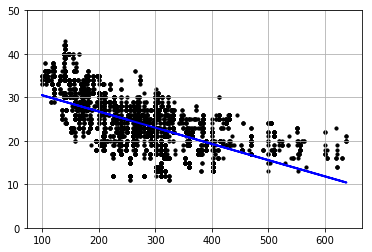

In [7]:
plt.axis(ymax = 50)
plt.grid()

ys_predict = model.predict(xs_reshape)

plt.scatter(xs, ys, color='black', s=10)
plt.plot(xs, ys_predict, color='blue', linewidth=2)

## Part 03 - Classification


- Using `sklearn` create a classifier that can predict the make of a car, based on provided features. The following features should be included:
  - `City mpg`
  - `Highway mpg`
  - `Height`
  - `Width`
  - `Length`
  - `Horsepower`
  - `Year`
- Show the decisiontree of your model.
- Use your model to predict the make of a car.

In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
features = ['City mpg', 'Highway mpg', 'Height', 'Width', 'Length', 'Horsepower', 'Year']
targets = df['Make']

model = dtc(max_leaf_nodes=100, random_state=0)
model.fit(df[features], df['Make'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### NOTE
Sadly we can't do this since neither of us in the grp has a Linux/Ubuntu machine - Therefore we can't use graphviz

In [26]:
#features = ['City mpg', 'Highway mpg', 'Height', 'Width', 'Length', 'Horsepower', 'Year'
Lambo = [[12, 20, 160, 108, 249, 552, 2012]]
Audi = [[21, 28, 140, 202, 143, 200, 2009]]
Kia = [[27, 36, 190, 158, 185, 110, 2010]]

prediction_lambo = model.predict(Lambo)
prediction_audi = model.predict(Audi)
prediction_kia = model.predict(Kia)                                
                                 
print('Actual Car Lamborghini:', prediction_lambo)
print('Actual Car Audi:', prediction_audi)
print('Actual Car Kia:', prediction_kia)

Actual Car Lamborghini: ['Jaguar']
Actual Car Audi: ['Audi']
Actual Car Kia: ['Hyundai']
